In [1]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [2]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 2s 0us/step


In [3]:
X_train #data is in form of pixel value

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [4]:
X_train.shape #60000 images => having 28*28 pixel

(60000, 28, 28)

In [5]:
X_test.shape

(10000, 28, 28)

In [6]:
y_train #labels -> every image contains which digit

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

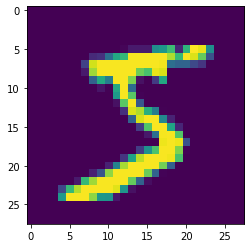

In [8]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0]) #5

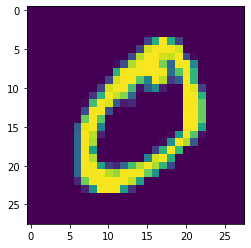

In [9]:
import matplotlib.pyplot as plt
plt.imshow(X_train[1]) #0

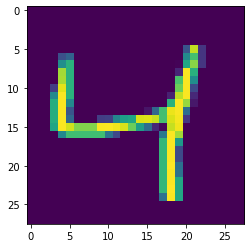

In [10]:
import matplotlib.pyplot as plt
plt.imshow(X_train[2]) #4

In [ ]:
X_train[0]

#### As our values of pixels range from 0 to 255, we need to scale the data. Reason for this is in deep learning as much the values are similar to each other that much sooner we will get the correct weights

#### For scaling we are going to divide all values with the largest value i.e. 255 so that when 255 value becomes 1

In [13]:
X_train = X_train/255
X_test = X_test/255

In [14]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [15]:
model1 = Sequential()

#### Currently our pixel data is in 2D, we want this in 1D to train our model on the data we have

In [16]:
model1.add(Flatten(input_shape=(28,28)))
model1.add(Dense(128,activation='relu'))
model1.add(Dense(10,activation = 'softmax')) #multiclassification

In [17]:
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [19]:
model1.compile(loss = 'sparse_categorical_crossentropy', optimizer='Adam') 
#if we use categorical__crossentropy then we have to do one-hot encoding; we donot have to do one-hot encoding when we use sparse_categorical_crossentropy

In [21]:
model1.fit(X_train,y_train, epochs = 10, validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2866 - val_loss: 0.1556
Epoch 2/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1264 - val_loss: 0.1158
Epoch 3/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0868 - val_loss: 0.1030
Epoch 4/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0648 - val_loss: 0.0958
Epoch 5/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0491 - val_loss: 0.0896
Epoch 6/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0388 - val_loss: 0.0962
Epoch 7/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0298 - val_loss: 0.0882
Epoch 8/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0254 - val_loss: 0.0868
Epoch 9/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0204 - val_loss: 0.0974
Epoch 10/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.016

In [25]:
#Our model is going to gives prob. of the output being 0,1,2,..9 for each image but we want the actual image pred so saving all prob in a var
y_prob = model1.predict(X_test)
y_prob 

array([[1.93472061e-12, 1.18193812e-12, 1.61765723e-09, ...,
        9.99999762e-01, 3.04029968e-10, 6.64099531e-09],
       [1.29701143e-12, 1.76873147e-08, 9.99999881e-01, ...,
        7.81644077e-21, 1.52364199e-09, 4.84397560e-15],
       [9.36939273e-07, 9.98565137e-01, 6.81406877e-04, ...,
        4.30832471e-04, 3.03250097e-04, 1.31670049e-07],
       ...,
       [1.07033525e-16, 5.97913239e-14, 9.27220167e-18, ...,
        7.30494554e-09, 4.87337358e-11, 1.61762807e-06],
       [1.17196969e-13, 8.25414041e-15, 7.38500583e-15, ...,
        6.55625762e-11, 2.68516305e-06, 3.25023652e-14],
       [2.84668990e-13, 8.75776216e-16, 3.62864730e-12, ...,
        5.72115741e-15, 1.83027794e-14, 3.88150704e-16]], dtype=float32)

In [30]:
#max prob location val => actual num
y_pred = y_prob.argmax(axis=1)

In [31]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9788

# Attempt to improve model accuracy

In [45]:
#adding one more hiden layer with 32 nodes
model2 = Sequential()
model2.add(Flatten(input_shape=(28,28)))
model2.add(Dense(128,activation='relu'))
model2.add(Dense(32,activation='relu'))
model2.add(Dense(10,activation = 'softmax')) #multiclassification
model2.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_9 (Dense)              (None, 32)                4128      
_________________________________________________________________
dense_10 (Dense)             (None, 10)                330       
Total params: 104,938
Trainable params: 104,938
Non-trainable params: 0
_________________________________________________________________


In [46]:
model2.compile(loss = 'sparse_categorical_crossentropy', optimizer='Adam', metrics = ['accuracy']) 
history = model2.fit(X_train,y_train, epochs = 25, validation_split=0.2)

Epoch 1/25
1500/1500 [==============================] - 4s 2ms/step - loss: 0.2889 - accuracy: 0.9152 - val_loss: 0.1495 - val_accuracy: 0.9572
Epoch 2/25
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1218 - accuracy: 0.9639 - val_loss: 0.1169 - val_accuracy: 0.9647
Epoch 3/25
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0815 - accuracy: 0.9751 - val_loss: 0.1086 - val_accuracy: 0.9703
Epoch 4/25
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0629 - accuracy: 0.9806 - val_loss: 0.0896 - val_accuracy: 0.9725
Epoch 5/25
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0487 - accuracy: 0.9849 - val_loss: 0.0956 - val_accuracy: 0.9716
Epoch 6/25
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0379 - accuracy: 0.9884 - val_loss: 0.1073 - val_accuracy: 0.9707
Epoch 7/25
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0323 - accuracy: 0.9893 - val_loss: 0.1119 - val_accuracy:

In [47]:
y_prob = model2.predict(X_test)
y_pred = y_prob.argmax(axis=1)

In [48]:
accuracy_score(y_test,y_pred)

0.976

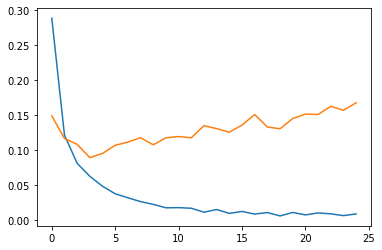

In [49]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

#### As epochs increase loss is decreasing
#### After a certain point val_loss increases meaning, on the validation split the model is performing worse

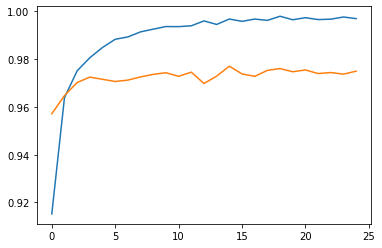

In [50]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

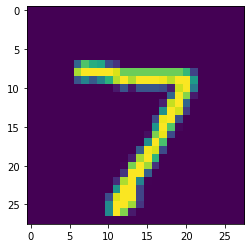

In [51]:
plt.imshow(X_test[0])

In [53]:
model.predict(X_test[0].reshape(1,28,28)).argmax(axis=1)

array([7], dtype=int64)

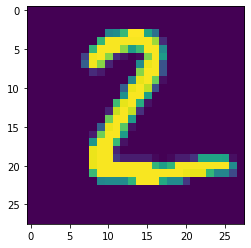

In [54]:
plt.imshow(X_test[1])

In [55]:
model.predict(X_test[1].reshape(1,28,28)).argmax(axis=1)

array([2], dtype=int64)